# Análise de redes sociais com dados do Facebook

### Bibliotecas

In [1]:
import networkx as nx
import matplotlib.pyplot as plt

### Sobre os dados

Está sendo utilizado o conjunto de dados de redes de ego combinadas do Facebook, que contém a rede agregada da lista de amigos de dez indivíduos do Facebook. A rede consiste em 4.039 nós, conectados através de 88.234 bordas.

**`Link dos dados`**: https://snap.stanford.edu/data/egonets-Facebook.html

### Carregamento dos dados

In [2]:
G_face = nx.read_edgelist('dados/facebook_combined.txt', create_using= nx.Graph(), nodetype=int)
print(nx.info(G_face))

Name: 
Type: Graph
Number of nodes: 4039
Number of edges: 88234
Average degree:  43.6910


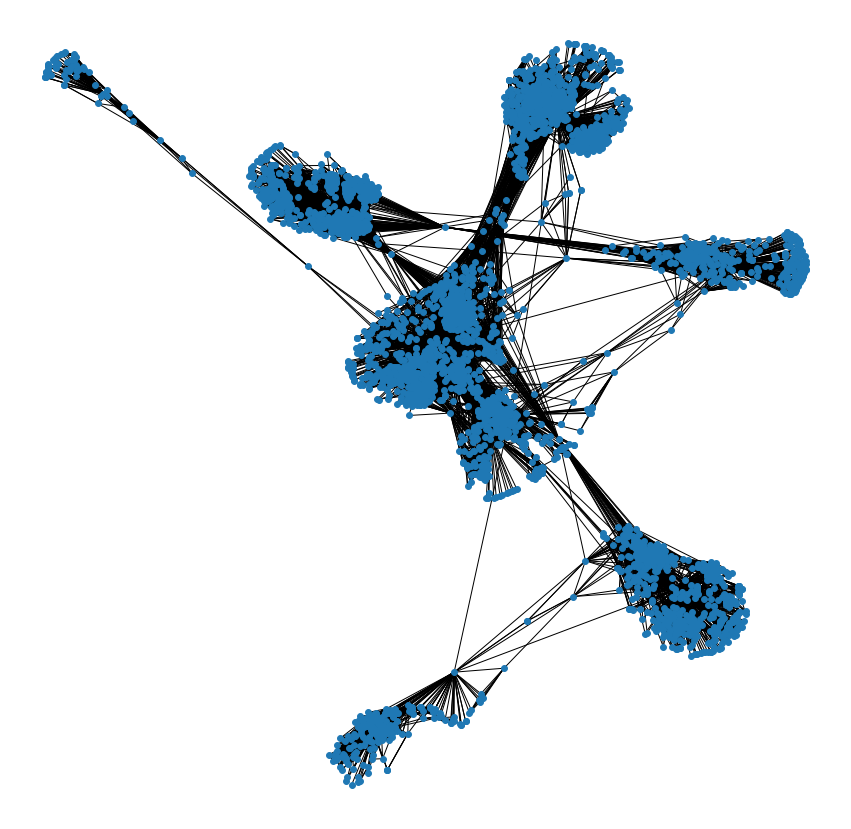

In [3]:
plt.figure(figsize=(15, 15))
nx.draw_networkx(G_face, pos= nx.spring_layout(G_face), with_labels= False, node_size= 35)
plt.axis('off')
plt.show()

### Centralidade de intermediação (betweenness centrality)

Representa a frequência na qual um ponto ocorre no caminho mais curtos que conectou o par de pontos.

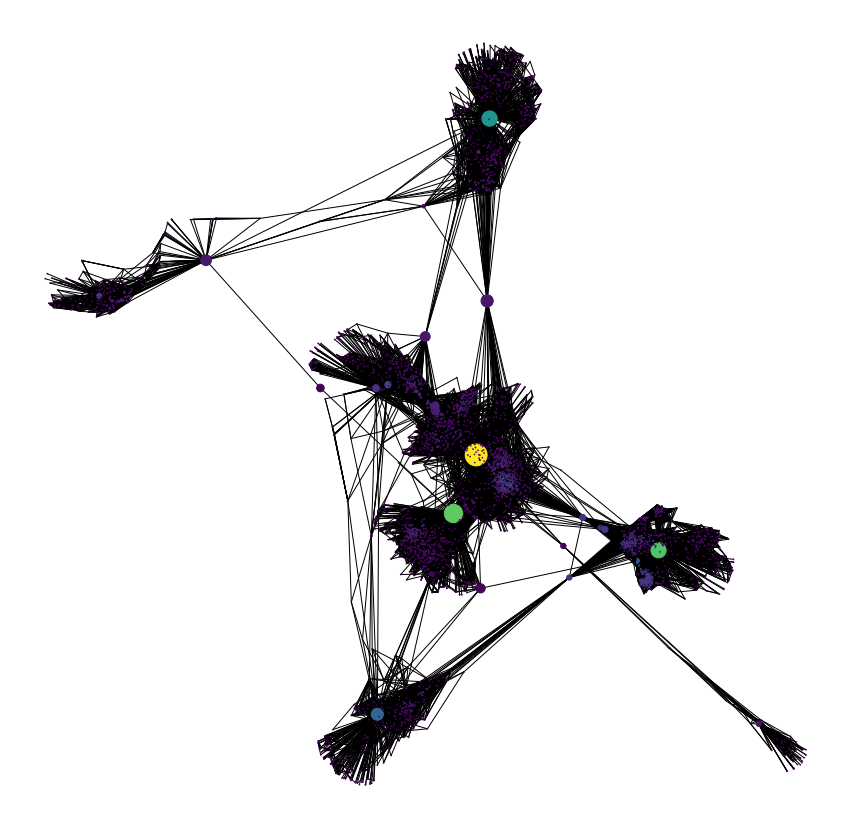

Nós com a maior centralidade de intermediação: [107, 1684, 3437, 1912, 1085]


In [4]:
pos= nx.spring_layout(G_face)
bet_center= nx.betweenness_centrality(G_face, normalized=True, endpoints=True)
node_color= [2000.0 * G_face.degree(v) for v in G_face]
node_size= [v * 1000 for v in bet_center.values()]

plt.figure(figsize=[15, 15])
nx.draw_networkx(G_face, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')
plt.show()

print(f'Nós com a maior centralidade de intermediação: {sorted(bet_center, key=bet_center.get, reverse=True)[:5]}')

### Centralidade do nó (degree centrality)

É uma medida do número de conexões que um nó específico possui na rede.

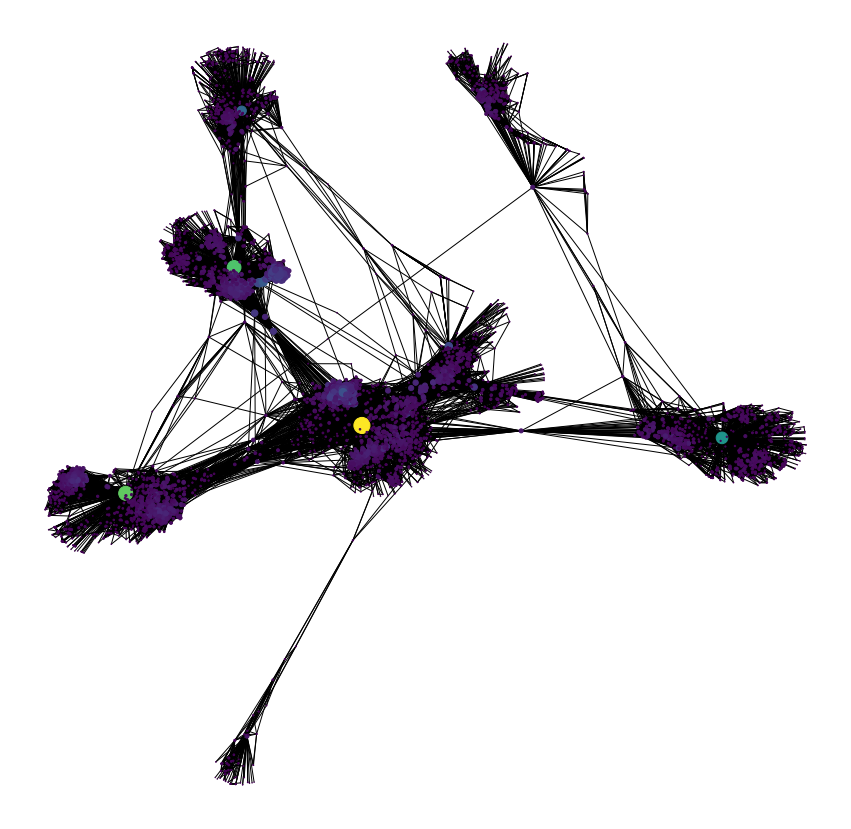

Nós com mais conexões na rede: [107, 1684, 1912, 3437, 0]


In [5]:
pos= nx.spring_layout(G_face)
deg_cent= nx.degree_centrality(G_face)
node_color= [2000.0 * G_face.degree(v) for v in G_face]
node_size= [v * 1000 for v in deg_cent.values()]

plt.figure(figsize=[15, 15])
nx.draw_networkx(G_face, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')
plt.show()

print(f'Nós com mais conexões na rede: {sorted(deg_cent, key=deg_cent.get, reverse=True)[:5]}')

### Centralidade do vetor próprio (eigenvector_centrality)

Decide que um nó é importante se estiver conectado a outros nós importantes.

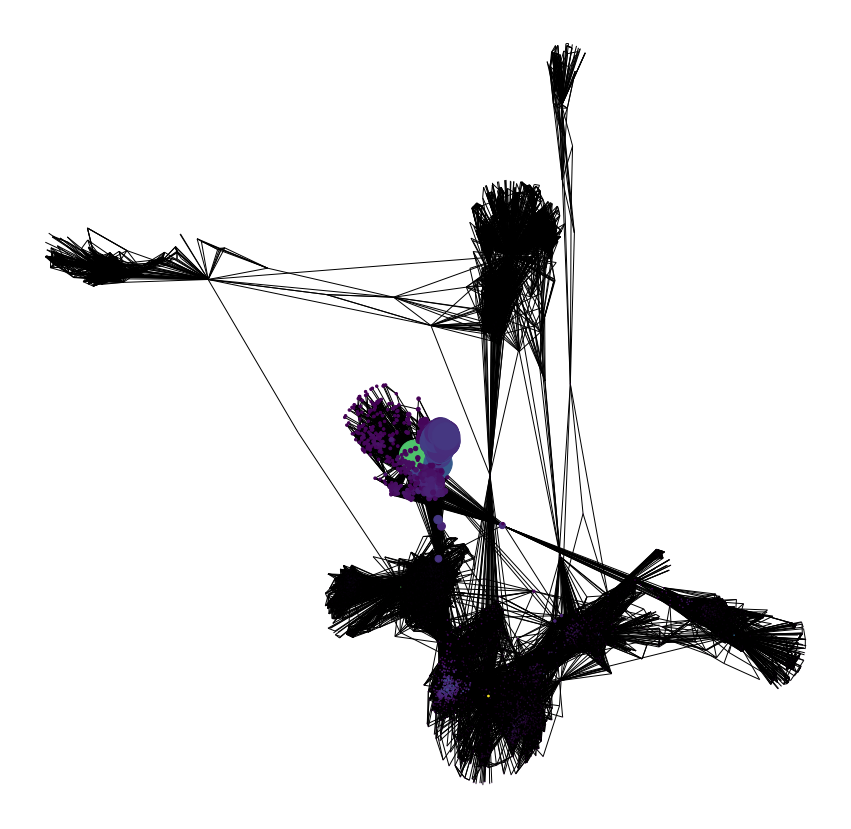

Nós com melhores relacionados na rede: [107, 1684, 1912, 3437, 0]


In [6]:
pos = nx.spring_layout(G_face)
eig_cent = nx.eigenvector_centrality(G_face)
node_color = [20000.0 * G_face.degree(v) for v in G_face]
node_size =  [v * 10000 for v in eig_cent.values()]

plt.figure(figsize=(15,15))
nx.draw_networkx(G_face, pos=pos, with_labels=False, node_color=node_color, node_size=node_size)
plt.axis('off')
plt.show()

print(f'Nós com melhores relacionados na rede: {sorted(deg_cent, key=deg_cent.get, reverse=True)[:5]}')

### Detecção de comunidades

In [7]:
#!pip install python-louvain

In [8]:
import community as community_louvain

In [ ]:
parts= community_louvain.best_partition(G_face)
values= [parts.get(node) for node in G_face.nodes()]

nx.draw_networkx(G_face, pos= nx.spring_layout(G_face), cmap= plt.get_cmap('jet'), node_color= values, 
                 node_size= 35, with_labels= False)
plt.axis('off')
plt.show()